# Accessing geoprocessing tools

In this page we will observe how you can search for geoprocessing tools and access them in your code. Thus, we will observe:
 - [Searching for geoprocessing tools](#searching-for-geoprocessing-tools)
 - [Pythonic representation of tools and toolboxes](#pythonic-representation-of-tools-and-toolboxes)
 - [Importing toolboxes](#importing-toolboxes)
   - [Importing toolbox from an `Item`](#importing-toolbox-from-an-item)
   - [Importing toolbox from a geoprocessing service URL](#importing-toolbox-from-a-geoprocessing-service-url)
 - [Tool signature, parameters and documentation](#tool-signature-parameters-and-documentation)

<a id="searching-for-geoprocessing-tools"></a>
## Searching for geoprocessing tools

Geoprocessing tools can be considered as web tools that can shared with others. Users organize their tools into toolboxes and share with on their GIS. You can search for geoprocessing tools just like you search for any other item.

To search your GIS for geoprocessing toolboxes, specify `Geoprocessing Toolbox` as the item type.

In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

In [3]:
gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123')

In [4]:
toolboxes = gis.content.search('travel', 'Geoprocessing Toolbox', 
                               outside_org=True, max_items=3)

<Item title:"DriveTimePolygonsService" type:Geoprocessing Service owner:omolarakareem>
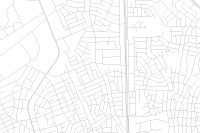

<Item title:"Ocean Currents" type:Geoprocessing Service owner:esri_apac>
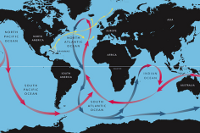

<Item title:"World Origin Destination Cost Matrix" type:Geoprocessing Service owner:esri>
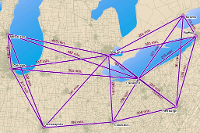

In [5]:
for toolbox in toolboxes:
    display(toolbox)

<a id="pythonic-representation-of-tools-and-toolboxes"></a>
## Pythonic representation of tools and toolboxes
In ArcGIS API for Python, geoprocessing toolboxes are represented as Python modules and the individual tools as Python functions. These tools, represented as Python functions, take in a set of input parameters and return one or more output values.

To use custom geoprocessing tools, users simply import that toolbox as a module in their programs and call functions within the module.

<a id="importing-toolboxes"></a>
## Importing toolboxes

The `import_toolbox()` function in the `arcgis.geoprocessing` module imports geoprocessing toolboxes as native Python modules. It accepts a toolbox location which could be a Geoprocessing Toolbox item in your GIS, or a URL to a Geoprocessing Service.

Developers can then call the functions available in the imported module to invoke these tools. Let us see how to import toolboxes from these two sources.

<a id="importing-toolbox-from-an-item"></a>
### Importing toolbox from an `Item`
The code snippet below shows how the Ocean Currents toolbox above can be imported as a module:

In [6]:
from arcgis.geoprocessing import import_toolbox

<Item title:"Ocean Currents" type:Geoprocessing Service owner:esri_apac>
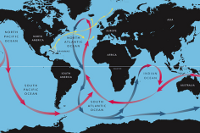

In [7]:
ocean_currents_toolbox = toolboxes[1]
ocean_currents_toolbox

In [8]:
ocean_currents = import_toolbox(ocean_currents_toolbox)

The `import_toolbox()` function inspects the geoprocessing toolbox and dynamically generates a Python module containing a function for each tool within the toolbox. Invoking the function invokes the corresponding geoprocessing tool. 

The code snippet below uses Python's `inspect` module to list the public functions in the imported module. Developers will typically use their IDE's intellisense to discover the functions in the module.

In [9]:
import inspect

# list the public functions in the imported module
[ f[0] for f in inspect.getmembers(ocean_currents, inspect.isfunction) 
             if not f[0].startswith('_')]

['message_in_a_bottle']

<a id="importing-toolbox-from-a-geoprocessing-service-url"></a>
### Importing toolbox from a geoprocessing service URL

The example below uses a URL to a geoprocessing service to import a geoprocessing toolbox:

In [10]:
zion_toolbox_url = 'http://gis.ices.dk/gis/rest/services/Tools/ExtractZionData/GPServer'
zion = import_toolbox(zion_toolbox_url)

<a id="tool-signature-parameters-and-documentation"></a>
## Tool signature, parameters and documentation

The function for invoking the geoprocessing tool includes documentation about that tool. This doc shows up using your IDE's intellisense and can also be accessed using Python's help function:

In [11]:
help(zion.extract_zion_data)

Help on function extract_zion_data:

extract_zion_data(layers_to_clip:str="['Research_areas', 'Roads', 'Springs', 'Zion park boundary']", area_of_interest:arcgis.features.feature.FeatureSet={'exceededTransferLimit': False, 'fields': [{'name': 'FID', 'alias': 'FID', 'type': 'esriFieldTypeOID'}, {'name': 'Id', 'alias': 'Id', 'type': 'esriFieldTypeInteger'}, {'name': 'Shape_Length', 'alias': 'Shape_Length', 'type': 'esriFieldTypeDouble'}, {'name': 'Shape_Area', 'alias': 'Shape_Area', 'type': 'esriFieldTypeDouble'}], 'features': [], 'displayFieldName': '', 'spatialReference': {'wkid': None}, 'geometryType': 'esriGeometryPolygon'}, feature_format:str='File Geodatabase - GDB - .gdb', raster_format:str='ESRI GRID - GRID', gis=None) -> arcgis.geoprocessing._types.DataFile
            
     Extracts the specified Layers in the specified Area of Interest to the selected Formats and returns all the data in a zip file. This tool is intended primarily for use as a part of a geoprocessing service. F

As shown in the example above, tool functions are annotated using [type hints](https://www.python.org/dev/peps/pep-0484/) to help indicate the input they accept and the output they produce. The function signature includes default values for the input parameters, so the caller doesn't have to specify them unless required. Parameter documentation includes a description of each parameter, it's expected type, and whether it is required or optional. If the parameter accepts from a list of input values, that list is included with the documentation as a 'Choice List'. The documentation includes the type and description of the functions return value.

Next, head over to the topic [Using geoprocessing tools](/python/guide/using-geoprocessing-tools/) to see how these tools can be used in Python scripts.